In [804]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [812]:
data = pd.read_csv('./data.csv')


data['title'] = data['title'].apply(lambda x: x[1:])
data['person'] = data['person'].apply(lambda x: x[1:])
data['datetime'] = data['datetime'].apply(lambda x: x[1:])
data['number_size'] = data['number_size'].apply(lambda x: x[1:])



In [792]:
def normalize_df(df):
     return (df - df.min()) / (df.max() - df.min())
     

In [793]:
names = data.person.unique()
all_data_by_name = { name.replace(' ',''): { 'name': name} for name in names }

for name in all_data_by_name.keys():
     all_data_by_name[name] = data[data.person == name]



In [794]:
agg_functions = {'views': 'sum', 'person': 'first', "id": 'count'}

name_views = data.groupby(by='person', as_index=False).agg(agg_functions)


name_views = name_views.sort_values('views')


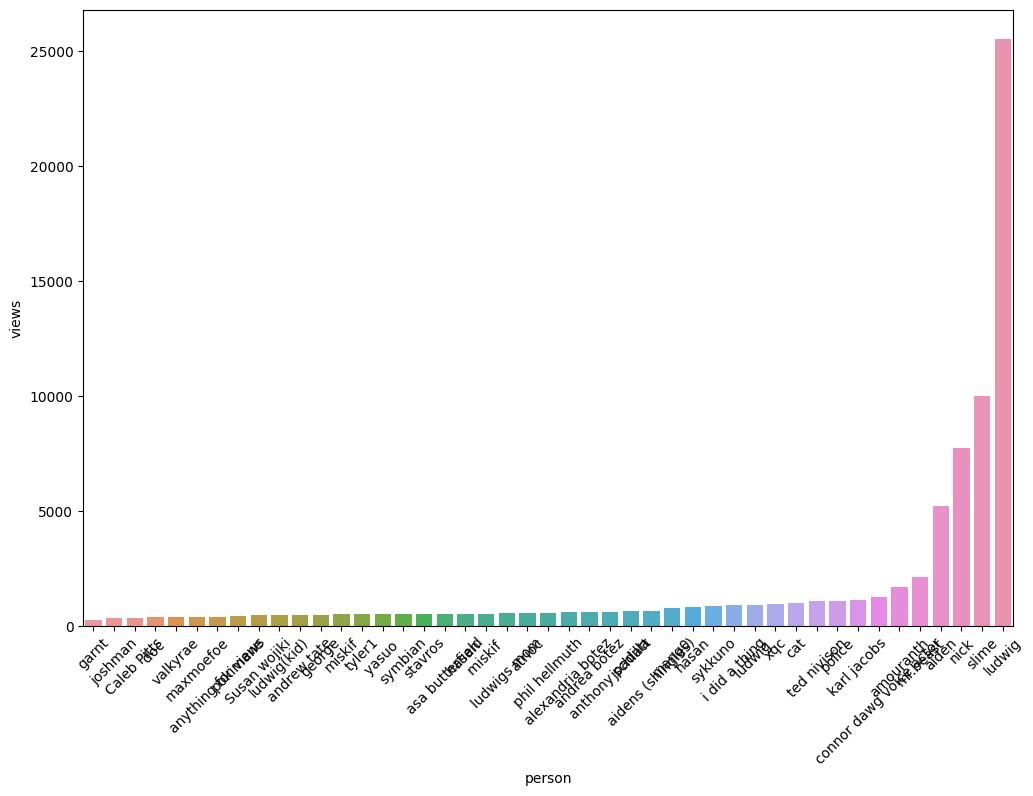

In [795]:
plt.figure(figsize=[12,8])
sns.barplot(x='person',y="views",data=name_views)
plt.xticks(rotation=45)

plt.show()

In [796]:
rank_by_appearance_views = name_views


rank_by_appearance_views['delta'] = rank_by_appearance_views.views / rank_by_appearance_views['id']

rank_by_appearance_views['delta'] = (normalize_df(rank_by_appearance_views['delta']))
rank_by_appearance_views = rank_by_appearance_views.sort_values('delta')
print(rank_by_appearance_views)

    views                   person  id     delta
15    229                    garnt   1  0.000000
20    314                  joshman   1  0.129969
0     348              Caleb Pitts   1  0.181957
35   1066                   police   3  0.193170
14    375                     doc    1  0.223242
42    386                 valkyrae   1  0.240061
28    389                maxmoefoe   1  0.244648
9     389       anything for views   1  0.244648
27    783                    mang0   2  0.248471
17    788                    hasan   2  0.252294
38    831                  sykkuno   2  0.285168
34    434                 pokimane   1  0.313456
24    894                  ludwig    2  0.333333
1     459             Susan wojiki   1  0.351682
25    463              ludwig(kid)   1  0.357798
7     465              andrew tate   1  0.360856
43    935                      xqc   2  0.364679
16    476                   george   1  0.377676
29    481                   miskif   1  0.385321
12    964           

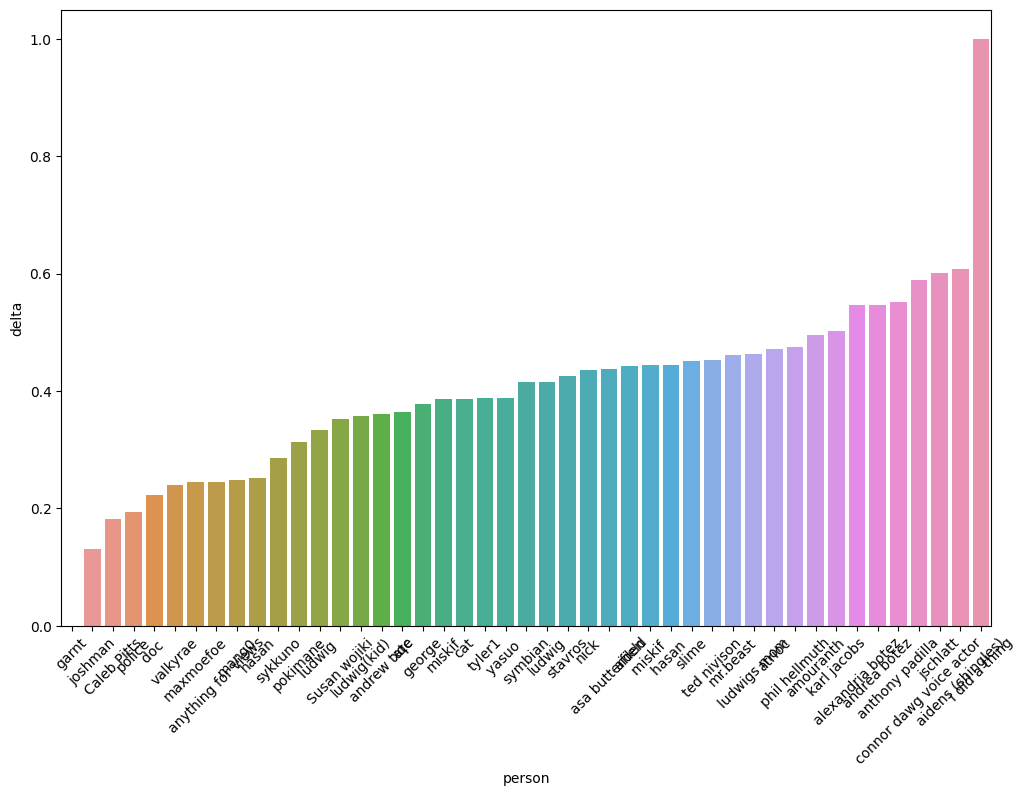

In [797]:
plt.figure(figsize=[12,8])
sns.barplot(x='person',y="delta",data=rank_by_appearance_views)
plt.xticks(rotation=45)
plt.show()
plt.close()

In [798]:
a__ = {'views': 'first', 'id': 'count'}

g = data.groupby(by='title', as_index=False).agg(a__).sort_values('views')
# sns.barplot(x='id',y='views', data=g)
# plt.show()


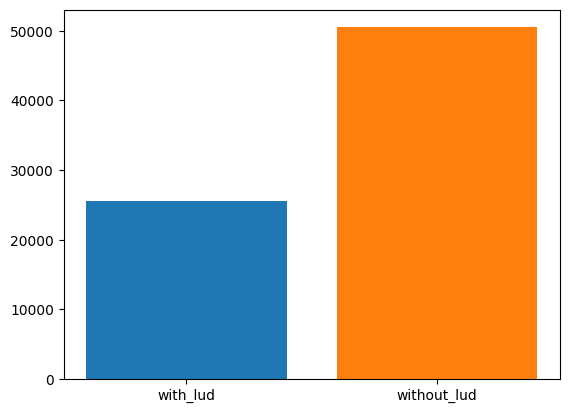

In [799]:
w_l = data[data.person == 'ludwig']
wo_l = data[data.person != 'ludwig']


plt.bar(x='with_lud',height=w_l.views.sum())
plt.bar(x='without_lud',height=wo_l.views.sum())
plt.show()

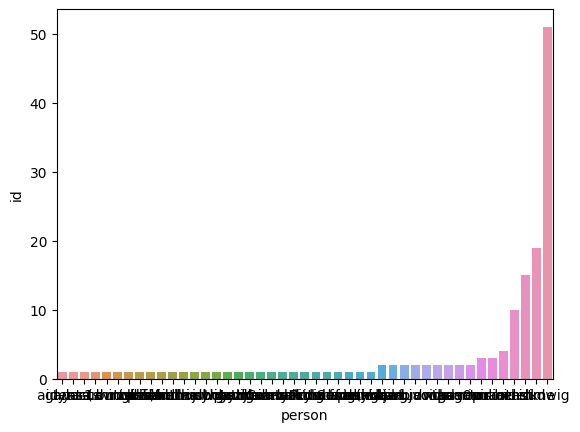

In [800]:
sns.barplot(x='person',y='id',data=rank_by_appearance_views.sort_values('id'));
plt.show()